## Kinematics of two-joint arm

<img src="https://www.gribblelab.org/compneuro/figs/twojointarm_kinematics.png">

**Original course figure**

In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib notebook

In [9]:
def joints_to_hand(a1, a2, l1, l2):
    '''
    function to convert joints to hands postition
    '''
    Ex = np.cos(a1) * l1
    Ey = np.sin(a2) * l1
    Hx = Ex + np.cos(a1 + a2) * l2
    Hy = Ey + np.sin(a1 + a2) * l2
    return Ex, Ey, Hx, Hy

In [3]:
# limb geometry
l1 = 0.34
l2 = 0.46

In [4]:
# range of angles
n1steps = 20
n2steps = 20
a1range = np.linspace(0, 120*np.pi/180, n1steps)
a2range = np.linspace(0, 120*np.pi/180, n2steps)

C:\Users\shcec\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\Users\shcec\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\shcec\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a pr

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

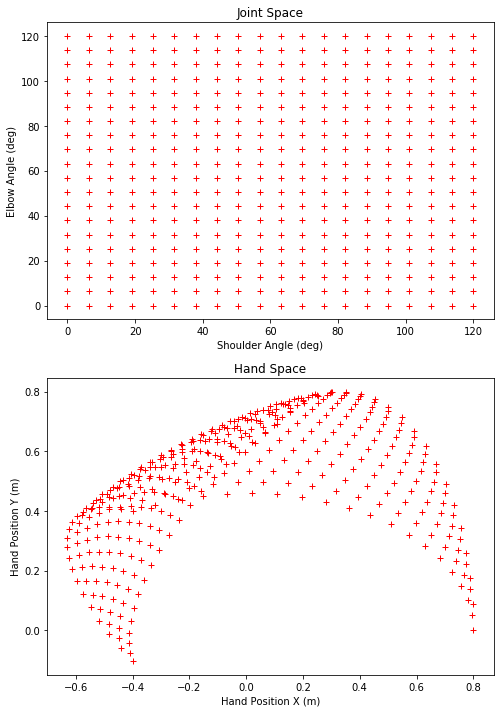

In [10]:
from numpy import *
from matplotlib.pyplot import *


f=figure(figsize=(8,12))
for i in range(n1steps):
  for j in range(n2steps):
    subplot(2,1,1)
    plot(a1range[i]*180/pi,a2range[j]*180/pi,'r+')
    ex,ey,hx,hy = joints_to_hand(a1range[i], a2range[j], l1, l2)
    subplot(2,1,2)
    plot(hx, hy, 'r+')
subplot(2,1,1)
xlabel('Shoulder Angle (deg)')
ylabel('Elbow Angle (deg)')
title('Joint Space')
subplot(2,1,2)
xlabel('Hand Position X (m)')
ylabel('Hand Position Y (m)')
title('Hand Space')
a1 = a1range[n1steps/2]
a2 = a2range[n2steps/2]
ex,ey,hx,hy = joints_to_hand(a1,a2,l1,l2)
subplot(2,1,1)
plot(a1*180/pi,a2*180/pi,'bo',markersize=5)
axis('equal')
xl = get(get(f,'axes')[0],'xlim')
yl = get(get(f,'axes')[0],'ylim')
plot((xl[0],xl[1]),(a2*180/pi,a2*180/pi),'b-')
plot((a1*180/pi,a1*180/pi),(yl[0],yl[1]),'b-')
subplot(2,1,2)
plot((0,ex,hx),(0,ey,hy),'b-')
plot(hx,hy,'bo',markersize=5)
axis('equal')
xl = get(get(f,'axes')[1],'xlim')
yl = get(get(f,'axes')[1],'ylim')
plot((xl[0],xl[1]),(hy,hy),'b-')
plot((hx,hx),(yl[0],yl[1]),'b-')

### The Jacobian
How can we compute hand velocities $\(\frac{dH}{dt}\)$ given joint velocities $\frac{d\theta}{dt}\$? If we can we compute an intermediate term \(\$frac{dH}{d\theta}$\) then we can apply the the Chain Rule:

\begin{equation} \frac{dH}{dt} = \frac{dH}{d\theta} \frac{d\theta}{dt} \end{equation}
This intermediate term is in fact known as the Jacobian (Wikipedia:Jacobian) matrix \(J(\theta)\) and is defined as:

\begin{equation} J(\theta) = \frac{dH}{d\theta} \end{equation}
and so:

\begin{equation} \frac{dH}{dt} = J(\theta) \frac{d\theta}{dt} \end{equation}
Note that the Jacobian is written as \(J(\theta)\) which means it is a function of joint angles \(\theta\) — in other words, the four terms in the Jacobian matrix (see below) change depending on limb configuration (joint angles). This means the relationships between joint angles and hand coordinates changes depending on where the limb is in its workspace. We already have an idea that this is true, from the figure above.

For the sake of notational brevity we will refer to hand velocities as \(\dot{H}\) and joint velocities as \(\dot{\theta}\) and we will omit (from the notation) the functional dependence of \(J\) on \(\theta\):

\begin{equation} \dot{H} = J \dot{\theta} \end{equation}
The Jacobian is a matrix-valued function; you can think of it like a vector version of the derivative of a scalar. The Jacobian matrix \(J\) encodes relationships between changes in joint angles and changes in hand positions.

\begin{equation} J = \frac{dH}{d\theta} = \left[ \begin{array}{cc} \frac{\partial H_{x}}{\partial \theta_{1}}, &\frac{\partial H_{x}}{\partial \theta_{2}}\\ \frac{\partial H_{y}}{\partial \theta_{1}}, &\frac{\partial H_{y}}{\partial \theta_{2}} \end{array} \right] \end{equation}
For a system with 2 joint angles \(\theta = (\theta_{1},\theta_{2})\) and 2 hand coordinates \(H = (H_{x},H_{y})\), the Jacobian \(J\) is a 2x2 matrix where each value codes the rate of change of a given hand coordinate with respect the given joint coordinate. So for example the term \(\frac{\partial H_{x}}{\partial \theta_{2}}\) represents the change in the \(x\) coordinate of the hand given a change in the elbow joint angle \(\theta_{2}\).

So how do we determine the four terms of \(J\)? We have to do calculus and differentiate the equations for \(H_{x}\) and \(H_{y}\) with respect to the joint angles \(\theta_{1}\) and \(\theta_{2}\). Fortunately we can use a Python package for symbolic computation called SymPy to help us with the calculus. (you will have to install SymPy… on Ubuntu (or any Debian-based GNU/Linux), just type sudo apt-get install python-sympy)